# 0. Setup Paths

In [1]:
import os

In [2]:
CUSTOM_MODEL_NAME = 'my_ssd_mobnet' 
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'

In [3]:
paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME), 
    'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'), 
    'TFJS_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'), 
    'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'), 
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
 }

In [4]:
files = {
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [5]:
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}

# 1. Download TF Models Pretrained Models from Tensorflow Model Zoo and Install TFOD

In [6]:
# https://www.tensorflow.org/install/source_windows

In [7]:
if os.name=='nt':
    !pip install wget
    import wget

In [5]:
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
    !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}

Cloning into 'Tensorflow\models'...
Updating files:  19% (686/3608)
Updating files:  20% (722/3608)
Updating files:  21% (758/3608)
Updating files:  22% (794/3608)
Updating files:  23% (830/3608)
Updating files:  24% (866/3608)
Updating files:  25% (902/3608)
Updating files:  26% (939/3608)
Updating files:  27% (975/3608)
Updating files:  28% (1011/3608)
Updating files:  29% (1047/3608)
Updating files:  30% (1083/3608)
Updating files:  31% (1119/3608)
Updating files:  32% (1155/3608)
Updating files:  33% (1191/3608)
Updating files:  34% (1227/3608)
Updating files:  35% (1263/3608)
Updating files:  36% (1299/3608)
Updating files:  37% (1335/3608)
Updating files:  38% (1372/3608)
Updating files:  39% (1408/3608)
Updating files:  40% (1444/3608)
Updating files:  41% (1480/3608)
Updating files:  42% (1516/3608)
Updating files:  43% (1552/3608)
Updating files:  44% (1588/3608)
Updating files:  44% (1590/3608)
Updating files:  45% (1624/3608)
Updating files:  46% (1660/3608)
Updating files: 

In [8]:
# Install Tensorflow Object Detection 
if os.name=='posix':  
    !apt-get install protobuf-compiler
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python -m pip install . 
    
if os.name=='nt':
    url="https://github.com/protocolbuffers/protobuf/releases/download/v24.4/protoc-24.4-win64.zip"
    wget.download(url)
    !move protoc-24.4-win64.zip {paths['PROTOC_PATH']}
    !cd {paths['PROTOC_PATH']} && tar -xf protoc-24.4-win64.zip
    os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin'))   
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
    !cd Tensorflow/models/research/slim && pip install -e . 

100% [..........................................................................] 2910319 / 2910319        1 file(s) moved.
        1 file(s) copied.
running build
running build_py
creating build
creating build\lib
creating build\lib\object_detection
copying object_detection\eval_util.py -> build\lib\object_detection
copying object_detection\eval_util_test.py -> build\lib\object_detection
copying object_detection\exporter.py -> build\lib\object_detection
copying object_detection\exporter_lib_tf2_test.py -> build\lib\object_detection
copying object_detection\exporter_lib_v2.py -> build\lib\object_detection
copying object_detection\exporter_main_v2.py -> build\lib\object_detection
copying object_detection\exporter_tf1_test.py -> build\lib\object_detection
copying object_detection\export_inference_graph.py -> build\lib\object_detection
copying object_detection\export_tflite_graph_lib_tf2.py -> build\lib\object_detection
copying object_detection\export_tflite_graph_lib_tf2_test.py -> build

E:\Ahmed Zayed\Projects\Computer Vision\Object_Detection_with_Tensorflow\venv\Lib\site-packages\setuptools\_distutils\cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` directly.
        Instead, use pypa/build, pypa/installer or other
        standards-based tools.

        See https://blog.ganssle.io/articles/2021/10/setup-py-deprecated.html for details.
        ********************************************************************************

!!
  self.initialize_options()
E:\Ahmed Zayed\Projects\Computer Vision\Object_Detection_with_Tensorflow\venv\Lib\site-packages\setuptools\_distutils\cmd.py:66: EasyInstallDeprecationWarning: easy_install command is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` and ``easy_install``.
        In

Obtaining file:///E:/Ahmed%20Zayed/Projects/Computer%20Vision/Object_Detection_with_Tensorflow/Tensorflow/models/research/slim
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Obtaining dependency information for absl-py>=0.2.2 from https://files.pythonhosted.org/packages/01/e4/dc0a1dcc4e74e08d7abedab278c795eef54a224363bb18f5692f416d834f/absl_py-2.0.0-py3-none-any.whl.metadata
  Using cached absl_py-2.0.0-py3-none-any.whl.metadata (2.3 kB)
Using cached absl_py-2.0.0-py3-none-any.whl (130 kB)
  Running setup.py develop for slim


DEPRECATION: Loading egg at e:\ahmed zayed\projects\computer vision\object_detection_with_tensorflow\venv\lib\site-packages\apache_beam-2.51.0-py3.11-win-amd64.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at e:\ahmed zayed\projects\computer vision\object_detection_with_tensorflow\venv\lib\site-packages\avro_python3-1.10.2-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at e:\ahmed zayed\projects\computer vision\object_detection_with_tensorflow\venv\lib\site-packages\contextlib2-21.6.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at e:\ahmed zayed\projects\computer vision\object_detection_with_tensorflow\venv\lib\site-packages\cython-3.0.3-py3.11.egg is depr

In [26]:
import os
import wget
import tarfile
import zipfile


# 1. Install Dependencies
# Make sure you have Python and required dependencies installed.
# Create a virtual environment (optional but recommended) for the API installation.

# 2. Install Protobuf Compiler
# if os.name == 'nt':  # For Windows
    #url="https://github.com/protocolbuffers/protobuf/releases/download/v24.4/protoc-24.4-win64.zip"
    #wget.download(url)
    #os.rename("protoc-24.4-win64.zip", "protoc.zip")
#     with zipfile.ZipFile("protoc.zip", "r") as zip_ref:
#         zip_ref.extractall("protoc")
#     !move protoc ./Tensorflow

# 3. Set Environment Variable
#os.environ['PATH'] += os.pathsep + os.path.abspath("Tensorflow/protoc/bin")

# 4. Clone the TensorFlow Models Repository

# 5. Compile Protobuf Files
%cd ../
#!protoc object_detection/protos/*.proto --python_out=.

# 6. Install the Object Detection API
!pip install -r ./official/requirements.txt

E:\Ahmed Zayed\Projects\Computer Vision\Object_Detection_with_Tensorflow\Tensorflow\models
  Obtaining dependency information for google-api-python-client>=1.6.7 from https://files.pythonhosted.org/packages/13/c5/fb079e4846b0ba36d65f343cea33b36cd558986d3caa8e58a4f8d3397147/google_api_python_client-2.103.0-py2.py3-none-any.whl.metadata
  Using cached google_api_python_client-2.103.0-py2.py3-none-any.whl.metadata (6.6 kB)
  Using cached kaggle-1.5.16.tar.gz (83 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached oauth2client-4.1.3-py2.py3-none-any.whl (98 kB)
  Obtaining dependency information for pandas>=0.22.0 from https://files.pythonhosted.org/packages/2d/5e/9213ea10ac473e2437dc2cb17323ddc0999997e2713d6a0b683b10773994/pandas-2.1.1-cp311-cp311-win_amd64.whl.metadata
  Using cached pandas-2.1.1-cp311-cp311-win_amd64.whl.metadata (18 kB)
  Using cached py_cpuinfo-9.0.0-py3-none-any.whl (22 kB)
  Obtaining dependency in

   ----------------------------------- ---- 4.5/5.0 MB 106.6 kB/s eta 0:00:06
   ----------------------------------- ---- 4.5/5.0 MB 106.6 kB/s eta 0:00:06
   ----------------------------------- ---- 4.5/5.0 MB 106.6 kB/s eta 0:00:06
   ----------------------------------- ---- 4.5/5.0 MB 106.9 kB/s eta 0:00:05
   ----------------------------------- ---- 4.5/5.0 MB 106.9 kB/s eta 0:00:05
   ----------------------------------- ---- 4.5/5.0 MB 106.8 kB/s eta 0:00:05
   ----------------------------------- ---- 4.5/5.0 MB 106.8 kB/s eta 0:00:05
   ----------------------------------- ---- 4.5/5.0 MB 106.8 kB/s eta 0:00:05
   ------------------------------------ --- 4.5/5.0 MB 111.5 kB/s eta 0:00:05
   ------------------------------------ --- 4.5/5.0 MB 111.5 kB/s eta 0:00:05
   ------------------------------------ --- 4.5/5.0 MB 111.5 kB/s eta 0:00:05
   ------------------------------------ --- 4.5/5.0 MB 111.5 kB/s eta 0:00:05
   ------------------------------------ --- 4.5/5.0 MB 111.5 kB/

In [37]:
!pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/80/6f/57d36f6507e432d7fc1956b2e9e8530c5c2d2bfcd8821bcbfae271cd6688/tensorflow-2.14.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.14.0 from https://files.pythonhosted.org/packages/ad/6e/1bfe367855dd87467564f7bf9fa14f3b17889988e79598bc37bf18f5ffb6/tensorflow_intel-2.14.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-none-any.whl.metadata
     ---------------------------------------- 0.0/57.5 kB ? eta -:--:--
     -------------------- ----------------- 30.7/57.5 kB 640.0 kB/s eta 0:00:01
     --------------------------------- ---- 51.2/57.5 kB 650.2 kB/s eta 0:00:01
     -------------------------------------- 57.5/57.5 kB 429.4 kB/s eta 0:00:00
  Obtaining depe

ERROR: Exception:
Traceback (most recent call last):
  File "E:\Ahmed Zayed\Projects\Computer Vision\Object_Detection_with_Tensorflow\venv\Lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "E:\Ahmed Zayed\Projects\Computer Vision\Object_Detection_with_Tensorflow\venv\Lib\site-packages\pip\_vendor\urllib3\response.py", line 561, in read
    data = self._fp_read(amt) if not fp_closed else b""
           ^^^^^^^^^^^^^^^^^^
  File "E:\Ahmed Zayed\Projects\Computer Vision\Object_Detection_with_Tensorflow\venv\Lib\site-packages\pip\_vendor\urllib3\response.py", line 527, in _fp_read
    return self._fp.read(amt) if amt is not None else self._fp.read()
           ^^^^^^^^^^^^^^^^^^
  File "E:\Ahmed Zayed\Projects\Computer Vision\Object_Detection_with_Tensorflow\venv\Lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 90, in read
    data = self.__fp.read(amt)
           ^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Administrator\AppData\Local

   ------------- ------------------------ 104.6/284.2 MB 446.6 kB/s eta 0:06:43
   ------------- ------------------------ 104.6/284.2 MB 447.2 kB/s eta 0:06:42
   ------------- ------------------------ 104.6/284.2 MB 447.8 kB/s eta 0:06:41
   ------------- ------------------------ 104.7/284.2 MB 448.8 kB/s eta 0:06:41
   -------------- ----------------------- 104.7/284.2 MB 451.5 kB/s eta 0:06:38
   -------------- ----------------------- 104.7/284.2 MB 452.1 kB/s eta 0:06:37
   -------------- ----------------------- 104.8/284.2 MB 458.2 kB/s eta 0:06:32
   -------------- ----------------------- 104.8/284.2 MB 461.7 kB/s eta 0:06:29
   -------------- ----------------------- 104.8/284.2 MB 464.7 kB/s eta 0:06:26
   -------------- ----------------------- 104.8/284.2 MB 464.7 kB/s eta 0:06:26
   -------------- ----------------------- 104.8/284.2 MB 464.7 kB/s eta 0:06:26
   -------------- ----------------------- 104.9/284.2 MB 468.3 kB/s eta 0:06:23
   -------------- ----------------------

In [21]:
VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# Verify Installation
!python {VERIFICATION_SCRIPT}

Running tests under Python 3.10.0: E:\Ahmed Zayed\Projects\Computer Vision\Object_Detection_with_Tensorflow\venv3.10\Scripts\python.exe
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
2023-10-13 20:38:03.960149: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE SSE2 SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
W1013 20:38:04.027272  2876 batch_normalization.py:1531] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with parameter `synchronized` set to True.
E:\Ahmed Zayed\Projects\Computer Vision\Object_Detection_with_Tensorflow\venv3.10\lib\site-packages\object_detection\builders\model_builder.py:1112: DeprecationWarning: The 'warn' function i

In [18]:
!pip install pyyaml --upgrade

  Obtaining dependency information for pyyaml from https://files.pythonhosted.org/packages/b3/34/65bb4b2d7908044963ebf614fe0fdb080773fc7030d7e39c8d3eddcd4257/PyYAML-6.0.1-cp311-cp311-win_amd64.whl.metadata
  Using cached PyYAML-6.0.1-cp311-cp311-win_amd64.whl.metadata (2.1 kB)
Using cached PyYAML-6.0.1-cp311-cp311-win_amd64.whl (144 kB)


DEPRECATION: Loading egg at e:\ahmed zayed\projects\computer vision\object_detection_with_tensorflow\venv\lib\site-packages\apache_beam-2.51.0-py3.11-win-amd64.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at e:\ahmed zayed\projects\computer vision\object_detection_with_tensorflow\venv\lib\site-packages\avro_python3-1.10.2-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at e:\ahmed zayed\projects\computer vision\object_detection_with_tensorflow\venv\lib\site-packages\contextlib2-21.6.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at e:\ahmed zayed\projects\computer vision\object_detection_with_tensorflow\venv\lib\site-packages\cython-3.0.3-py3.11.egg is depr

In [13]:
!pip uninstall protobuf matplotlib -y
!pip install protobuf matplotlib==3.2

Found existing installation: protobuf 3.15.7
Uninstalling protobuf-3.15.7:
  Successfully uninstalled protobuf-3.15.7
Found existing installation: matplotlib 3.4.1
Uninstalling matplotlib-3.4.1:
  Successfully uninstalled matplotlib-3.4.1

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
apache-beam 2.28.0 requires crcmod<2.0,>=1.7, which is not installed.
apache-beam 2.28.0 requires dill<0.3.2,>=0.3.1.1, which is not installed.
apache-beam 2.28.0 requires fastavro<2,>=0.21.4, which is not installed.
apache-beam 2.28.0 requires future<1.0.0,>=0.18.2, which is not installed.
apache-beam 2.28.0 requires grpcio<2,>=1.29.0, which is not installed.
apache-beam 2.28.0 requires hdfs<3.0.0,>=2.1.0, which is not installed.
apache-beam 2.28.0 requires httplib2<0.18.0,>=0.8, which is not installed.
apache-beam 2.28.0 requires mock<3.0.0,>=1.0.1, which is not installed.
tensorflow 2.5.0rc0 requires astunparse~=1.6.3, which is not installed.
tensorflow 2.5.0rc0 requires flatbuffers~=1.12.0, which is not installed.
tensorflow 2.5.0rc0 requires gast==0.4.0, which is not installed.
tensorflow 2.5.0rc0 requires go


  Using cached matplotlib-3.2.0-cp37-cp37m-win_amd64.whl (9.2 MB)


In [45]:
!pip install --upgrade setuptools
!cd ./Tensorflow/models/research && pip install .

Processing e:\ahmed zayed\projects\computer vision\object_detection_with_tensorflow\tensorflow\models\research


  error: subprocess-exited-with-error
  
  Getting requirements to build wheel did not run successfully.
  exit code: 1
  
  [68 lines of output]
  C:\Users\Administrator\AppData\Local\Temp\pip-build-env-8qj2t5va\overlay\Lib\site-packages\setuptools\config\setupcfg.py:293: _DeprecatedConfig: Deprecated config in `setup.cfg`
  !!
  
          ********************************************************************************
          The license_file parameter is deprecated, use license_files instead.
  
          By 2023-Oct-30, you need to update your project and remove deprecated calls
          or your builds will no longer be supported.
  
          See https://setuptools.pypa.io/en/latest/userguide/declarative_config.html for details.
          ********************************************************************************
  
  !!
    parsed = self.parsers.get(option_name, lambda x: x)(value)
  running egg_info
  writing lib3\PyYAML.egg-info\PKG-INFO
  writing dependency_links to l

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Obtaining dependency information for apache-beam from https://files.pythonhosted.org/packages/43/c3/c35f521f79698d749c016179acf0718c6d9c8a6ecc9d2b45f84ff92c6be2/apache_beam-2.51.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for pillow from https://files.pythonhosted.org/packages/54/9b/debe992677af84859ec1e38777b1d5c0671918188324153ecbc1f16f6cb6/Pillow-10.0.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for lxml from https://files.pythonhosted.org/packages/31/58/e3b3dd6bb2ab7404f1f4992e2d0e6926ed40cef8ce1b3bbefd95877499e1/lxml-4.9.3-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/40/d9/c1784db9db0d484c8e5deeafbaac0d6ed66e165c6eb4a74fb43a5fa947d9/matplotl

In [44]:
!pip cache purge


Files removed: 897


DEPRECATION: Loading egg at e:\ahmed zayed\projects\computer vision\object_detection_with_tensorflow\venv\lib\site-packages\apache_beam-2.51.0-py3.11-win-amd64.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at e:\ahmed zayed\projects\computer vision\object_detection_with_tensorflow\venv\lib\site-packages\avro_python3-1.10.2-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at e:\ahmed zayed\projects\computer vision\object_detection_with_tensorflow\venv\lib\site-packages\contextlib2-21.6.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at e:\ahmed zayed\projects\computer vision\object_detection_with_tensorflow\venv\lib\site-packages\cython-3.0.3-py3.11.egg is depr

DEPRECATION: Loading egg at e:\ahmed zayed\projects\computer vision\object_detection_with_tensorflow\venv\lib\site-packages\apache_beam-2.51.0-py3.11-win-amd64.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at e:\ahmed zayed\projects\computer vision\object_detection_with_tensorflow\venv\lib\site-packages\avro_python3-1.10.2-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at e:\ahmed zayed\projects\computer vision\object_detection_with_tensorflow\venv\lib\site-packages\contextlib2-21.6.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at e:\ahmed zayed\projects\computer vision\object_detection_with_tensorflow\venv\lib\site-packages\cython-3.0.3-py3.11.egg is depr

In [40]:
!pip uninstall apache-beam
!pip install apache-beam


^C

DEPRECATION: Loading egg at e:\ahmed zayed\projects\computer vision\object_detection_with_tensorflow\venv\lib\site-packages\apache_beam-2.51.0-py3.11-win-amd64.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at e:\ahmed zayed\projects\computer vision\object_detection_with_tensorflow\venv\lib\site-packages\avro_python3-1.10.2-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at e:\ahmed zayed\projects\computer vision\object_detection_with_tensorflow\venv\lib\site-packages\contextlib2-21.6.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at e:\ahmed zayed\projects\computer vision\object_detection_with_tensorflow\venv\lib\site-packages\cython-3.0.3-py3.11.egg is depr


  Using cached crcmod-1.7-cp311-cp311-win_amd64.whl
  Obtaining dependency information for orjson<4,>=3.9.7 from https://files.pythonhosted.org/packages/48/1a/a6aaaabc3a252d39c148b2e259b51d0db6f0377e5113bb6922212339ef58/orjson-3.9.8-cp311-none-win_amd64.whl.metadata
  Using cached orjson-3.9.8-cp311-none-win_amd64.whl.metadata (50 kB)
  Using cached dill-0.3.1.1-py3-none-any.whl
  Using cached cloudpickle-2.2.1-py3-none-any.whl (25 kB)
  Obtaining dependency information for fastavro<2,>=0.23.6 from https://files.pythonhosted.org/packages/73/d7/d716b8a2d31af0a8984ff43e4d6b96739cc6f98264505aaa7255e273613e/fastavro-1.8.4-cp311-cp311-win_amd64.whl.metadata
  Using cached fastavro-1.8.4-cp311-cp311-win_amd64.whl.metadata (5.7 kB)
  Obtaining dependency information for fasteners<1.0,>=0.3 from https://files.pythonhosted.org/packages/61/bf/fd60001b3abc5222d8eaa4a204cd8c0ae78e75adc688f33ce4bf25b7fafa/fasteners-0.19-py3-none-any.whl.metadata
  Using cached fasteners-0.19-py3-none-any.whl.metad

In [5]:
from Tensorflow.models.research import object_detection

In [18]:
!pip list

Package                       Version             Location
----------------------------- ------------------- --------------------------------------------------------
absl-py                       0.12.0
apache-beam                   2.28.0
astunparse                    1.6.3
avro-python3                  1.10.2
backcall                      0.2.0
cached-property               1.5.2
cachetools                    4.2.1
certifi                       2020.12.5
chardet                       4.0.0
colorama                      0.4.4
contextlib2                   0.6.0.post1
cycler                        0.10.0
cython                        3.0a6
dataclasses                   0.8
decorator                     5.0.3
flatbuffers                   1.12
gast                          0.4.0
gin-config                    0.4.0
google-api-python-client      2.1.0
google-auth                   1.28.0
google-auth-oauthlib          0.4.4
google-cloud-bigquery         2.13.1
google-pasta                 

In [24]:
if os.name =='posix':
    !wget {PRETRAINED_MODEL_URL}
    !mv {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}
if os.name == 'nt':
    wget.download(PRETRAINED_MODEL_URL)
    !move {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

100% [........................................................................] 20515344 / 20515344        1 file(s) moved.


x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.index
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/saved_model.pb
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.index


# 2. Create Label Map

In [8]:
labels = [{'name':'ThumbsUp', 'id':1}, {'name':'ThumbsDown', 'id':2}, {'name':'ThankYou', 'id':3}, {'name':'LiveLong', 'id':4}]

with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

# 3. Create TF records

In [26]:
# OPTIONAL IF RUNNING ON COLAB
ARCHIVE_FILES = os.path.join(paths['IMAGE_PATH'], 'archive.tar.gz')
if os.path.exists(ARCHIVE_FILES):
  !tar -zxvf {ARCHIVE_FILES}

In [27]:
if not os.path.exists(files['TF_RECORD_SCRIPT']):
    !git clone https://github.com/nicknochnack/GenerateTFRecord {paths['SCRIPTS_PATH']}

Cloning into 'Tensorflow\scripts'...


In [30]:
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'train')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')} 
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'test')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'test.record')} 

Successfully created the TFRecord file: Tensorflow\workspace\annotations\train.record
Successfully created the TFRecord file: Tensorflow\workspace\annotations\test.record


In [29]:
!pip install pytz

  Obtaining dependency information for pytz from https://files.pythonhosted.org/packages/32/4d/aaf7eff5deb402fd9a24a1449a8119f00d74ae9c2efa79f8ef9994261fc2/pytz-2023.3.post1-py2.py3-none-any.whl.metadata
  Using cached pytz-2023.3.post1-py2.py3-none-any.whl.metadata (22 kB)
Using cached pytz-2023.3.post1-py2.py3-none-any.whl (502 kB)


DEPRECATION: Loading egg at e:\ahmed zayed\projects\computer vision\object_detection_with_tensorflow\venv\lib\site-packages\apache_beam-2.51.0-py3.11-win-amd64.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at e:\ahmed zayed\projects\computer vision\object_detection_with_tensorflow\venv\lib\site-packages\avro_python3-1.10.2-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at e:\ahmed zayed\projects\computer vision\object_detection_with_tensorflow\venv\lib\site-packages\contextlib2-21.6.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at e:\ahmed zayed\projects\computer vision\object_detection_with_tensorflow\venv\lib\site-packages\cython-3.0.3-py3.11.egg is depr

# 4. Copy Model Config to Training Folder

In [31]:
if os.name =='posix':
    !cp {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}
if os.name == 'nt':
    !copy {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

        1 file(s) copied.


# 5. Update Config For Transfer Learning

In [10]:
import tensorflow as tf
from Tensorflow.models.research.object_detection.utils import config_util
from Tensorflow.models.research.object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [11]:
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])

In [12]:
config

{'model': ssd {
   num_classes: 4
   image_resizer {
     fixed_shape_resizer {
       height: 320
       width: 320
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v2_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 3.9999998989515007e-05
         }
       }
       initializer {
         random_normal_initializer {
           mean: 0.0
           stddev: 0.009999999776482582
         }
       }
       activation: RELU_6
       batch_norm {
         decay: 0.996999979019165
         scale: true
         epsilon: 0.0010000000474974513
       }
     }
     use_depthwise: true
     override_base_feature_extractor_hyperparams: true
     fpn {
       min_level: 3
       max_level: 7
       additional_layer_depth: 128
     }
   }
   box_coder {
     faster_rcnn_box_coder {
       y_scale: 10.0
       x_scale: 10.0
       height_scale: 5.0
       width_scale: 5.0
     }
   }
   match

In [13]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)  

In [14]:
pipeline_config.model.ssd.num_classes = len(labels)
pipeline_config.train_config.batch_size = 4
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.record')]

In [15]:
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)   

# 6. Train the model

In [16]:
TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')

In [17]:
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=2000".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'])

In [18]:
print(command)

python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\my_ssd_mobnet --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --num_train_steps=2000


In [23]:
!{command}

E:\Ahmed Zayed\Projects\Computer Vision\Object_Detection_with_Tensorflow\venv3.10\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
2023-10-13 21:09:25.012374: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE SSE2 SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/

 'Loss/total_loss': 0.21045536,
 'learning_rate': 0.07993342}
I1013 23:18:09.993025  2916 model_lib_v2.py:708] {'Loss/classification_loss': 0.042487588,
 'Loss/localization_loss': 0.022915209,
 'Loss/regularization_loss': 0.14505255,
 'Loss/total_loss': 0.21045536,
 'learning_rate': 0.07993342}
INFO:tensorflow:Step 2000 per-step time 3.875s
I1013 23:24:37.882004  2916 model_lib_v2.py:705] Step 2000 per-step time 3.875s
INFO:tensorflow:{'Loss/classification_loss': 0.14747754,
 'Loss/localization_loss': 0.044805635,
 'Loss/regularization_loss': 0.1442775,
 'Loss/total_loss': 0.33656067,
 'learning_rate': 0.07991781}
I1013 23:24:37.883004  2916 model_lib_v2.py:708] {'Loss/classification_loss': 0.14747754,
 'Loss/localization_loss': 0.044805635,
 'Loss/regularization_loss': 0.1442775,
 'Loss/total_loss': 0.33656067,
 'learning_rate': 0.07991781}


# 7. Evaluate the Model

In [24]:
command = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])

In [21]:
print(command)

python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\my_ssd_mobnet --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --checkpoint_dir=Tensorflow\workspace\models\my_ssd_mobnet


In [22]:
!pip list

Package                       Version


----------------------------- ------------
absl-py                       1.4.0
apache-beam                   2.51.0
array-record                  0.4.1
asttokens                     2.4.0
astunparse                    1.6.3
avro-python3                  1.10.2
backcall                      0.2.0
bleach                        6.1.0
cachetools                    5.3.1
certifi                       2023.7.22
charset-normalizer            3.3.0
click                         8.1.7
cloudpickle                   2.2.1
colorama                      0.4.6
comm                          0.1.4
contextlib2                   21.6.0
contourpy                     1.1.1
crcmod                        1.7
cycler                        0.12.1
Cython                        0.29.36
debugpy                       1.8.0
decorator                     5.1.1
dill                          0.3.1.1
dm-tree                       0.1.8
dnspython                     2.4.2
docopt                        0.6.2
etils     

In [25]:
!{command}

creating index...
index created!
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.33s).
Accumulating evaluation results...
DONE (t=0.08s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.688
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 1.000
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.750
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.688
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.700
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.700
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.700
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000


E:\Ahmed Zayed\Projects\Computer Vision\Object_Detection_with_Tensorflow\venv3.10\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
W1014 00:03:47.769315 10740 model_lib_v2.py:1089] Forced number of epochs for all eval validations to be 1.
INFO:tensorflow:Maybe overwriting sample_1_of_n_eval_examples: None
I1014 00:03:47.770239 10740 config_util.py:552] Maybe overwriting sample_1_of_n_eval_examples: None
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I1014 00:03:47.770239 10740 config_util.py:552] Maybe overwriting use_bfloat16: False
INFO:te

# 8. Load Train Model From Checkpoint

In [26]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [36]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-3')).expect_partial()

# @tf.function
# def detect_fn(image):
#     image, shapes = detection_model.preprocess(image)
#     prediction_dict = detection_model.predict(image, shapes)
#     detections = detection_model.postprocess(prediction_dict, shapes)
#     return detections

@tf.function
def detect_fn(image):
    global detection_model  # Use a global variable for the detection model
    if detection_model is None:
        detection_model = initialize_detection_model()  

    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

# 9. Detect from an Image

In [28]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [29]:
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])

In [32]:
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'test', 'thankyou.5f9ee8ef-642e-11ee-af1b-dc536079b084.jpg')

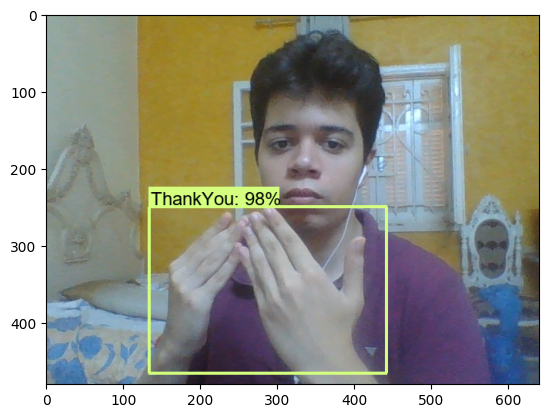

In [37]:
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.8,
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

# 10. Real Time Detections from your Webcam

In [ ]:
!pip uninstall opencv-python-headless -y

In [39]:
cap = cv2.VideoCapture(0)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

while cap.isOpened(): 
    ret, frame = cap.read()
    image_np = np.array(frame)
    
    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)
    
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detections['detection_classes']+label_id_offset,
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                min_score_thresh=.8,
                agnostic_mode=False)

    cv2.imshow('object detection',  cv2.resize(image_np_with_detections, (800, 600)))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()
        break

# 10. Freezing the Graph

In [40]:
FREEZE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'exporter_main_v2.py ')

In [41]:
command = "python {} --input_type=image_tensor --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(FREEZE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['OUTPUT_PATH'])

In [42]:
print(command)

python Tensorflow\models\research\object_detection\exporter_main_v2.py  --input_type=image_tensor --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --trained_checkpoint_dir=Tensorflow\workspace\models\my_ssd_mobnet --output_directory=Tensorflow\workspace\models\my_ssd_mobnet\export


In [43]:
!{command}

2023-10-14 16:25:54.921489: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE SSE2 SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.map_fn(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.map_fn(fn, elems))
W1014 16:25:57.596210 12556 deprecation.py:641] From E:\Ahmed Zayed\Projects\Computer Vision\Object_Detection_with_Tensorflow\venv3.10\lib\site-packages\tensorflow\python\autograph\impl\api.py:459: calling map_fn_v2 (from tensorflow.python.ops.map_fn) with back_prop=False is deprecated and will be removed in a future version.
Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient in

# 11. Conversion to TFJS

In [56]:
!pip install tensorflowjs

  Obtaining dependency information for tensorflowjs from https://files.pythonhosted.org/packages/c2/dc/dc75fc289a1cebb5a71f817c4657497529452d76df0ce0dfc14057f99cb0/tensorflowjs-4.11.0-py3-none-any.whl.metadata
  Obtaining dependency information for flax>=0.7.2 from https://files.pythonhosted.org/packages/5c/69/6aaa77d3fa3599d64527196e0b231476fa2cffc4995675974e22d9df83e9/flax-0.7.4-py3-none-any.whl.metadata
  Obtaining dependency information for jax>=0.4.13 from https://files.pythonhosted.org/packages/b5/5b/5131520dd9a384a640399e5efe4324fdee9e8a48685a33d08eb47140ccc3/jax-0.4.18-py3-none-any.whl.metadata
  Obtaining dependency information for jaxlib>=0.4.13 from https://files.pythonhosted.org/packages/b5/8d/13818c8169cc52094b7b239e03b731e42adfb829dd9d2ecec712b2383883/jaxlib-0.4.18-cp310-cp310-win_amd64.whl.metadata
INFO: pip is looking at multiple versions of tensorflowjs to determine which version is compatible with other requirements. This could take a while.
  Obtaining dependency inf

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'E:\\Ahmed Zayed\\Projects\\Computer Vision\\Object_Detection_with_Tensorflow\\venv3.10\\Lib\\site-packages\\google\\~rotobuf\\internal\\_api_implementation.cp310-win_amd64.pyd'
Check the permissions.



     --------------------------------------- 1.3/272.8 MB 34.8 kB/s eta 2:09:59
     --------------------------------------- 1.3/272.8 MB 34.8 kB/s eta 2:09:59
     --------------------------------------- 1.3/272.8 MB 34.8 kB/s eta 2:09:59
     --------------------------------------- 1.3/272.8 MB 34.8 kB/s eta 2:09:59
     --------------------------------------- 1.3/272.8 MB 34.8 kB/s eta 2:09:59
     --------------------------------------- 1.3/272.8 MB 34.8 kB/s eta 2:09:59
     --------------------------------------- 1.3/272.8 MB 34.8 kB/s eta 2:09:59
     --------------------------------------- 1.3/272.8 MB 34.8 kB/s eta 2:09:59
     --------------------------------------- 1.3/272.8 MB 34.7 kB/s eta 2:10:19
     --------------------------------------- 1.3/272.8 MB 34.7 kB/s eta 2:10:19
     --------------------------------------- 1.3/272.8 MB 34.7 kB/s eta 2:10:19
     --------------------------------------- 1.3/272.8 MB 34.7 kB/s eta 2:10:19
     -----------------------------------

     - ------------------------------------ 10.9/272.8 MB 33.5 kB/s eta 2:10:20
     - ------------------------------------ 10.9/272.8 MB 33.5 kB/s eta 2:10:20
     - ------------------------------------ 10.9/272.8 MB 33.5 kB/s eta 2:10:20
     - ------------------------------------ 10.9/272.8 MB 33.5 kB/s eta 2:10:20
     - ------------------------------------ 10.9/272.8 MB 33.5 kB/s eta 2:10:20
     - ------------------------------------ 10.9/272.8 MB 33.5 kB/s eta 2:10:20
     - ------------------------------------ 10.9/272.8 MB 33.5 kB/s eta 2:10:20
     - ------------------------------------ 10.9/272.8 MB 33.5 kB/s eta 2:10:20
     - ------------------------------------ 10.9/272.8 MB 33.5 kB/s eta 2:10:20
     - ------------------------------------ 10.9/272.8 MB 33.5 kB/s eta 2:10:20
     - ------------------------------------ 10.9/272.8 MB 33.5 kB/s eta 2:10:20
     - ------------------------------------ 10.9/272.8 MB 33.5 kB/s eta 2:10:20
     - ---------------------------------

     - ------------------------------------ 12.6/272.8 MB 32.1 kB/s eta 2:15:06
     - ------------------------------------ 12.6/272.8 MB 32.1 kB/s eta 2:15:06
     - ------------------------------------ 12.6/272.8 MB 32.1 kB/s eta 2:15:06
     - ------------------------------------ 12.6/272.8 MB 32.1 kB/s eta 2:15:06
     - ------------------------------------ 12.6/272.8 MB 32.1 kB/s eta 2:15:06
     - ------------------------------------ 12.6/272.8 MB 32.1 kB/s eta 2:15:06
     - ------------------------------------ 12.6/272.8 MB 32.1 kB/s eta 2:15:06
     - ------------------------------------ 12.6/272.8 MB 32.1 kB/s eta 2:15:06
     - ------------------------------------ 12.6/272.8 MB 32.1 kB/s eta 2:15:06
     - ------------------------------------ 12.6/272.8 MB 32.1 kB/s eta 2:15:06
     - ------------------------------------ 12.6/272.8 MB 31.4 kB/s eta 2:17:58
     - ------------------------------------ 12.6/272.8 MB 31.4 kB/s eta 2:17:58
     - ---------------------------------

     - ------------------------------------ 13.8/272.8 MB 34.4 kB/s eta 2:05:35
     - ------------------------------------ 13.8/272.8 MB 34.4 kB/s eta 2:05:35
     - ------------------------------------ 13.8/272.8 MB 34.4 kB/s eta 2:05:35
     - ------------------------------------ 13.8/272.8 MB 34.7 kB/s eta 2:04:35
     - ------------------------------------ 13.8/272.8 MB 34.7 kB/s eta 2:04:35
     - ------------------------------------ 13.8/272.8 MB 34.7 kB/s eta 2:04:35
     - ------------------------------------ 13.8/272.8 MB 34.7 kB/s eta 2:04:35
     - ------------------------------------ 13.8/272.8 MB 34.7 kB/s eta 2:04:35
     - ------------------------------------ 13.8/272.8 MB 34.7 kB/s eta 2:04:35
     - ------------------------------------ 13.8/272.8 MB 34.7 kB/s eta 2:04:35
     - ------------------------------------ 13.8/272.8 MB 34.7 kB/s eta 2:04:35
     - ------------------------------------ 13.8/272.8 MB 34.7 kB/s eta 2:04:35
     - ---------------------------------

     --- ---------------------------------- 25.4/272.8 MB 27.5 kB/s eta 2:30:03
     --- ---------------------------------- 25.4/272.8 MB 27.5 kB/s eta 2:30:03
     --- ---------------------------------- 25.4/272.8 MB 27.5 kB/s eta 2:30:03
     --- ---------------------------------- 25.4/272.8 MB 27.5 kB/s eta 2:30:03
     --- ---------------------------------- 25.4/272.8 MB 27.5 kB/s eta 2:30:03
     --- ---------------------------------- 25.4/272.8 MB 27.5 kB/s eta 2:30:03
     --- ---------------------------------- 25.4/272.8 MB 27.5 kB/s eta 2:30:03
     --- ---------------------------------- 25.4/272.8 MB 27.5 kB/s eta 2:30:03
     --- ---------------------------------- 25.4/272.8 MB 27.5 kB/s eta 2:30:03
     --- ---------------------------------- 25.4/272.8 MB 27.5 kB/s eta 2:30:03
     --- ---------------------------------- 25.4/272.8 MB 27.5 kB/s eta 2:30:03
     --- ---------------------------------- 25.4/272.8 MB 27.5 kB/s eta 2:30:03
     --- -------------------------------

     --- ---------------------------------- 27.3/272.8 MB 34.8 kB/s eta 1:57:31
     --- ---------------------------------- 27.4/272.8 MB 35.2 kB/s eta 1:56:23
     --- ---------------------------------- 27.4/272.8 MB 35.2 kB/s eta 1:56:23
     --- ---------------------------------- 27.4/272.8 MB 35.2 kB/s eta 1:56:23
     --- ---------------------------------- 27.4/272.8 MB 35.2 kB/s eta 1:56:23
     --- ---------------------------------- 27.4/272.8 MB 35.2 kB/s eta 1:56:23
     --- ---------------------------------- 27.4/272.8 MB 35.2 kB/s eta 1:56:23
     --- ---------------------------------- 27.4/272.8 MB 35.2 kB/s eta 1:56:23
     --- ---------------------------------- 27.4/272.8 MB 35.2 kB/s eta 1:56:23
     --- ---------------------------------- 27.4/272.8 MB 35.2 kB/s eta 1:56:23
     --- ---------------------------------- 27.4/272.8 MB 35.2 kB/s eta 1:56:23
     --- ---------------------------------- 27.4/272.8 MB 35.2 kB/s eta 1:56:23
     --- -------------------------------

     --- ---------------------------------- 28.4/272.8 MB 25.1 kB/s eta 2:42:30
     --- ---------------------------------- 28.4/272.8 MB 25.1 kB/s eta 2:42:30
     --- ---------------------------------- 28.4/272.8 MB 27.1 kB/s eta 2:30:10
     --- ---------------------------------- 28.4/272.8 MB 27.1 kB/s eta 2:30:10
     --- ---------------------------------- 28.4/272.8 MB 27.1 kB/s eta 2:30:10
     --- ---------------------------------- 28.4/272.8 MB 27.1 kB/s eta 2:30:10
     --- ---------------------------------- 28.4/272.8 MB 27.1 kB/s eta 2:30:10
     --- ---------------------------------- 28.4/272.8 MB 27.1 kB/s eta 2:30:10
     --- ---------------------------------- 28.4/272.8 MB 27.1 kB/s eta 2:30:10
     --- ---------------------------------- 28.4/272.8 MB 27.1 kB/s eta 2:30:10
     --- ---------------------------------- 28.4/272.8 MB 27.5 kB/s eta 2:28:06
     --- ---------------------------------- 28.4/272.8 MB 27.5 kB/s eta 2:28:06
     --- -------------------------------

     ------------ ------------------------- 91.1/272.8 MB 94.7 kB/s eta 0:31:59
     ------------ ------------------------- 91.1/272.8 MB 94.7 kB/s eta 0:31:59
     ------------ ------------------------- 91.1/272.8 MB 94.7 kB/s eta 0:31:59
     ------------ ------------------------- 91.1/272.8 MB 94.7 kB/s eta 0:31:59
     ------------ ------------------------- 91.1/272.8 MB 94.7 kB/s eta 0:31:59
     ------------ ------------------------- 91.1/272.8 MB 94.7 kB/s eta 0:31:59
     ------------ ------------------------- 91.1/272.8 MB 94.7 kB/s eta 0:31:59
     ------------ ------------------------- 91.1/272.8 MB 94.7 kB/s eta 0:31:59
     ------------ ------------------------- 91.1/272.8 MB 94.7 kB/s eta 0:31:59
     ------------ ------------------------- 91.1/272.8 MB 94.7 kB/s eta 0:31:59
     ------------ ------------------------- 91.1/272.8 MB 94.7 kB/s eta 0:31:59
     ------------ ------------------------- 91.1/272.8 MB 94.7 kB/s eta 0:31:59
     ------------ ----------------------

     --------------- --------------------- 111.6/272.8 MB 27.4 kB/s eta 1:38:02
     --------------- --------------------- 111.6/272.8 MB 27.4 kB/s eta 1:38:02
     --------------- --------------------- 111.6/272.8 MB 27.4 kB/s eta 1:38:02
     --------------- --------------------- 111.6/272.8 MB 27.4 kB/s eta 1:38:02
     --------------- --------------------- 111.6/272.8 MB 27.4 kB/s eta 1:38:02
     --------------- --------------------- 111.6/272.8 MB 27.4 kB/s eta 1:38:02
     --------------- --------------------- 111.6/272.8 MB 27.4 kB/s eta 1:38:02
     --------------- --------------------- 111.6/272.8 MB 26.3 kB/s eta 1:42:04
     --------------- --------------------- 111.7/272.8 MB 26.4 kB/s eta 1:41:41
     --------------- --------------------- 111.7/272.8 MB 26.4 kB/s eta 1:41:41
     --------------- --------------------- 111.7/272.8 MB 26.4 kB/s eta 1:41:41
     --------------- --------------------- 111.7/272.8 MB 26.4 kB/s eta 1:41:41
     --------------- -------------------

     ---------------- ------------------- 121.8/272.8 MB 178.5 kB/s eta 0:14:06
     ---------------- ------------------- 121.8/272.8 MB 178.5 kB/s eta 0:14:06
     ---------------- ------------------- 121.8/272.8 MB 178.5 kB/s eta 0:14:06
     ---------------- ------------------- 121.9/272.8 MB 177.4 kB/s eta 0:14:11
     ---------------- ------------------- 121.9/272.8 MB 177.4 kB/s eta 0:14:11
     ---------------- ------------------- 121.9/272.8 MB 177.4 kB/s eta 0:14:12
     ---------------- ------------------- 121.9/272.8 MB 177.2 kB/s eta 0:14:13
     ---------------- ------------------- 121.9/272.8 MB 177.2 kB/s eta 0:14:13
     ---------------- ------------------- 121.9/272.8 MB 177.2 kB/s eta 0:14:13
     ---------------- ------------------- 121.9/272.8 MB 177.2 kB/s eta 0:14:13
     ---------------- ------------------- 121.9/272.8 MB 177.2 kB/s eta 0:14:13
     ---------------- ------------------- 121.9/272.8 MB 177.2 kB/s eta 0:14:13
     ---------------- ------------------

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [57]:
command = "tensorflowjs_converter --input_format=tf_saved_model --output_node_names='detection_boxes,detection_classes,detection_features,detection_multiclass_scores,detection_scores,num_detections,raw_detection_boxes,raw_detection_scores' --output_format=tfjs_graph_model --signature_name=serving_default {} {}".format(os.path.join(paths['OUTPUT_PATH'], 'saved_model'), paths['TFJS_PATH'])

In [58]:
print(command)

tensorflowjs_converter --input_format=tf_saved_model --output_node_names='detection_boxes,detection_classes,detection_features,detection_multiclass_scores,detection_scores,num_detections,raw_detection_boxes,raw_detection_scores' --output_format=tfjs_graph_model --signature_name=serving_default Tensorflow\workspace\models\my_ssd_mobnet\export\saved_model Tensorflow\workspace\models\my_ssd_mobnet\tfjsexport


In [59]:
!{command}

'tensorflowjs_converter' is not recognized as an internal or external command,
operable program or batch file.


In [47]:
# Test Code: https://github.com/nicknochnack/RealTimeSignLanguageDetectionwithTFJS

# 12. Conversion to TFLite

In [48]:
TFLITE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'export_tflite_graph_tf2.py ')

In [49]:
command = "python {} --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(TFLITE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['TFLITE_PATH'])

In [50]:
print(command)

python Tensorflow\models\research\object_detection\export_tflite_graph_tf2.py  --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --trained_checkpoint_dir=Tensorflow\workspace\models\my_ssd_mobnet --output_directory=Tensorflow\workspace\models\my_ssd_mobnet\tfliteexport


In [51]:
!{command}

2023-10-14 16:34:48.646204: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE SSE2 SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
I1014 16:35:25.039543 12284 api.py:460] feature_map_spatial_dims: [(40, 40), (20, 20), (10, 10), (5, 5), (3, 3)]
2023-10-14 16:35:45.351973: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:375] MLIR V1 optimization pass is not enabled
I1014 16:35:52.218955 12284 api.py:460] feature_map_spatial_dims: [(40, 40), (20, 20), (10, 10), (5, 5), (3, 3)]
I1014 16:35:59.990178 12284 signature_serialization.py:148] Function `inference_fn` contains input name(s) resource with unsupported characters which will be renamed to weightsharedconvolutionalboxpredictor_predictiontower_conv2d_3_batchnorm_feature_4_fusedbatchnormv3_readvariableop_1_resource in

In [52]:
FROZEN_TFLITE_PATH = os.path.join(paths['TFLITE_PATH'], 'saved_model')
TFLITE_MODEL = os.path.join(paths['TFLITE_PATH'], 'saved_model', 'detect.tflite')

In [53]:
command = "tflite_convert \
--saved_model_dir={} \
--output_file={} \
--input_shapes=1,300,300,3 \
--input_arrays=normalized_input_image_tensor \
--output_arrays='TFLite_Detection_PostProcess','TFLite_Detection_PostProcess:1','TFLite_Detection_PostProcess:2','TFLite_Detection_PostProcess:3' \
--inference_type=FLOAT \
--allow_custom_ops".format(FROZEN_TFLITE_PATH, TFLITE_MODEL, )

In [54]:
print(command)

tflite_convert --saved_model_dir=Tensorflow\workspace\models\my_ssd_mobnet\tfliteexport\saved_model --output_file=Tensorflow\workspace\models\my_ssd_mobnet\tfliteexport\saved_model\detect.tflite --input_shapes=1,300,300,3 --input_arrays=normalized_input_image_tensor --output_arrays='TFLite_Detection_PostProcess','TFLite_Detection_PostProcess:1','TFLite_Detection_PostProcess:2','TFLite_Detection_PostProcess:3' --inference_type=FLOAT --allow_custom_ops


In [55]:
!{command}

2023-10-14 16:38:10.304146: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE SSE2 SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-14 16:39:05.198070: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
2023-10-14 16:39:05.198135: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
2023-10-14 16:39:05.732735: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: Tensorflow\workspace\models\my_ssd_mobnet\tfliteexport\saved_model
2023-10-14 16:39:05.889179: I tensorflow/cc/saved_model/reader.cc:91] Reading meta graph with tags { serve }
2023-10-14 16:39:05.889259: I tensorflow/cc/saved_model/reader.cc:132] Reading SavedModel debug info (if present) from: Tensorf

# 13. Zip and Export Models 

In [ ]:
!tar -czf models.tar.gz {paths['CHECKPOINT_PATH']}

In [ ]:
from google.colab import drive
drive.mount('/content/drive')